In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
with open("c_v_optimization_results.pkl", "rb") as f:
    c_v_optimization_dict = pickle.load(f)
with open("u_mass_optimization_results.pkl", "rb") as f:
    u_mass_optimization_dict = pickle.load(f)

# CV Results

In [3]:
c_v_num_topics = [x.num_topics for x in c_v_optimization_dict]
c_v_topic_score_dict = dict(zip(c_v_num_topics, c_v_optimization_dict.values()))

In [4]:
c_v_topic_score_dict

{10: 0.359263514450774,
 30: 0.41302110965012895,
 50: 0.39332554113533336,
 70: 0.3898639888170444,
 90: 0.3995292760861183,
 110: 0.3701489465848217,
 130: 0.36907531317239933,
 150: 0.3883942443113886,
 170: 0.3701398553853529,
 190: 0.37378317916242554,
 210: 0.3782265767443861,
 230: 0.38224023165366683}

Text(0, 0.5, 'c_v score')

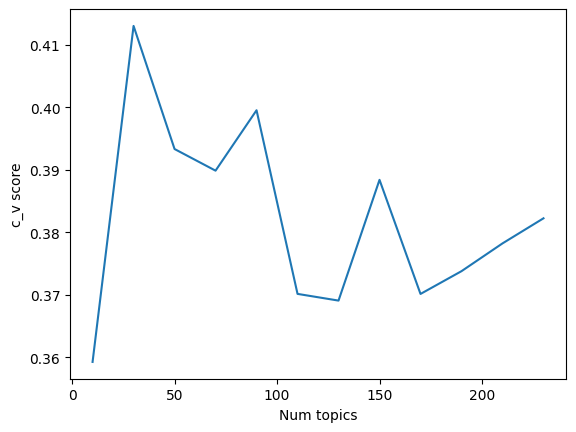

In [5]:
plt.plot(c_v_topic_score_dict.keys(), c_v_topic_score_dict.values())
plt.xlabel("Num topics")
plt.ylabel("c_v score")

# Umass results

In [6]:
u_mass_num_topics = [x.num_topics for x in u_mass_optimization_dict]
u_mass_topic_score_dict = dict(
    zip(u_mass_num_topics, u_mass_optimization_dict.values())
)

In [7]:
u_mass_topic_score_dict

{10: -0.8676632200049538,
 30: -1.2595748306045507,
 50: -1.47050343196454,
 70: -1.6800739340958115,
 90: -1.6056378259010011,
 110: -1.6419218530867838,
 130: -1.6904326156834408,
 150: -1.6776515094529676,
 170: -1.7016087415022665,
 190: -1.6174338449970402,
 210: -1.6631601012933201,
 230: -1.6075549008017942}

Text(0, 0.5, 'u_mass score')

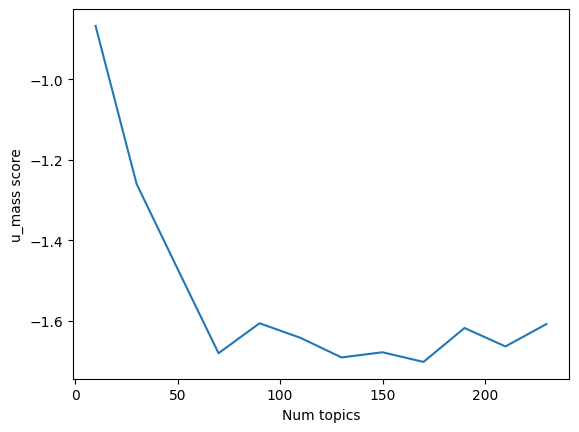

In [8]:
plt.plot(u_mass_topic_score_dict.keys(), u_mass_topic_score_dict.values())
plt.xlabel("Num topics")
plt.ylabel("u_mass score")

# Combined Results

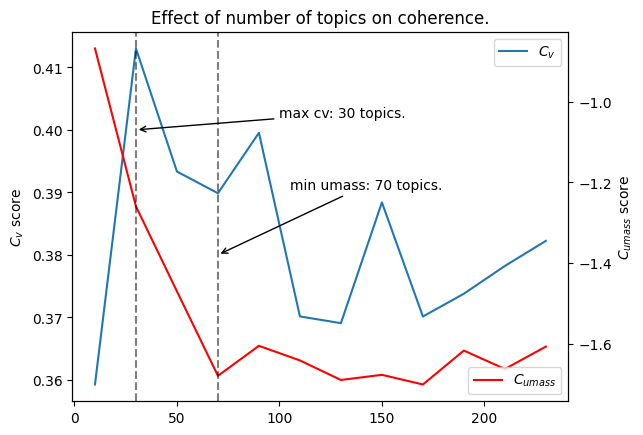

In [14]:
plt.rcParams['text.usetex'] = False
annot_text1 = """max cv: 30 topics."""
annot_text2 = """min umass: 70 topics."""

fig, ax = plt.subplots()
ax.plot(
    c_v_topic_score_dict.keys(), c_v_topic_score_dict.values(), label=r"$C_v$"
)
ax1 = ax.twinx()
ax1.plot(u_mass_topic_score_dict.keys(), u_mass_topic_score_dict.values(), "r", label=r'$C_{umass}$')
ax1.set_xlabel("Num topics")
ax1.set_ylabel(r'$C_{umass}$ score')
ax.set_ylabel(r"$C_v$ score")
ax.legend(loc="upper right")
ax1.legend(loc="lower right")
plt.axvline(70, color="black", linestyle="dashed", alpha = 0.5)
plt.axvline(30, color="black", linestyle="dashed", alpha = 0.5)
ax.annotate(
    text=annot_text1,
    xy=(30, 0.4),
    xytext=(100, 0.402),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
)
ax.annotate(
    text=annot_text2,
    xy=(70, 0.38),
    xytext=(105, 0.3905),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
)
plt.title("Effect of number of topics on coherence.")
plt.savefig("Optimization_results.png", format="png", facecolor="white")